In [1]:
import pandas as pd
import numpy as np

stud_perf  = pd.read_csv("data/student/student-mat.csv", delimiter=";")
stud_perf.G3.describe()
#stud_perf.G3.info()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

In [5]:
stud_perf[['Medu', 'G3']].groupby('Medu').describe()

G3                                                  
      count       mean       std  min   25%   50%   75%   max
Medu                                                         
0       3.0  13.000000  3.464102  9.0  12.0  15.0  15.0  15.0
1      59.0   8.677966  4.364594  0.0   7.5  10.0  11.0  16.0
2     103.0   9.728155  4.636163  0.0   8.0  11.0  13.0  19.0
3      99.0  10.303030  4.623486  0.0   8.0  10.0  13.0  19.0
4     131.0  11.763359  4.267646  0.0   9.5  12.0  15.0  20.0

In [10]:
pd.DataFrame.plot.hist?

Signature:
pd.DataFrame.plot.hist(
    self,
    by: 'IndexLabel | None' = None,
    bins: 'int' = 10,
    **kwargs,
) -> 'PlotAccessor'
Docstring:
Draw one histogram of the DataFrame's columns.

A histogram is a representation of the distribution of data.
This function groups the values of all given Series in the DataFrame
into bins and draws all bins in one :class:`matplotlib.axes.Axes`.
This is useful when the DataFrame's Series are in a similar scale.

Parameters
----------
by : str or sequence, optional
    Column in the DataFrame to group by.

    .. versionchanged:: 1.4.0

       Previously, `by` is silently ignore and makes no groupings

bins : int, default 10
    Number of histogram bins to be used.
**kwargs
    Additional keyword arguments are documented in
    :meth:`DataFrame.plot`.

Returns
-------
class:`matplotlib.AxesSubplot`
    Return a histogram plot.

See Also
--------
DataFrame.hist : Draw histograms per DataFrame's Series.
Series.hist : Draw a histogram with Serie

Text(0.5, 1.0, 'G3 histogram')

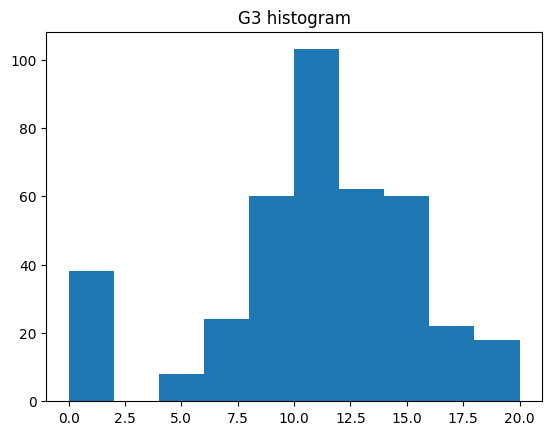

In [13]:
#| fig-align: center
#| out-width: "70%"
fig = stud_perf.G3.hist(grid=False)
fig.set_title('G3 histogram')

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>,
        <Axes: >]], dtype=object)

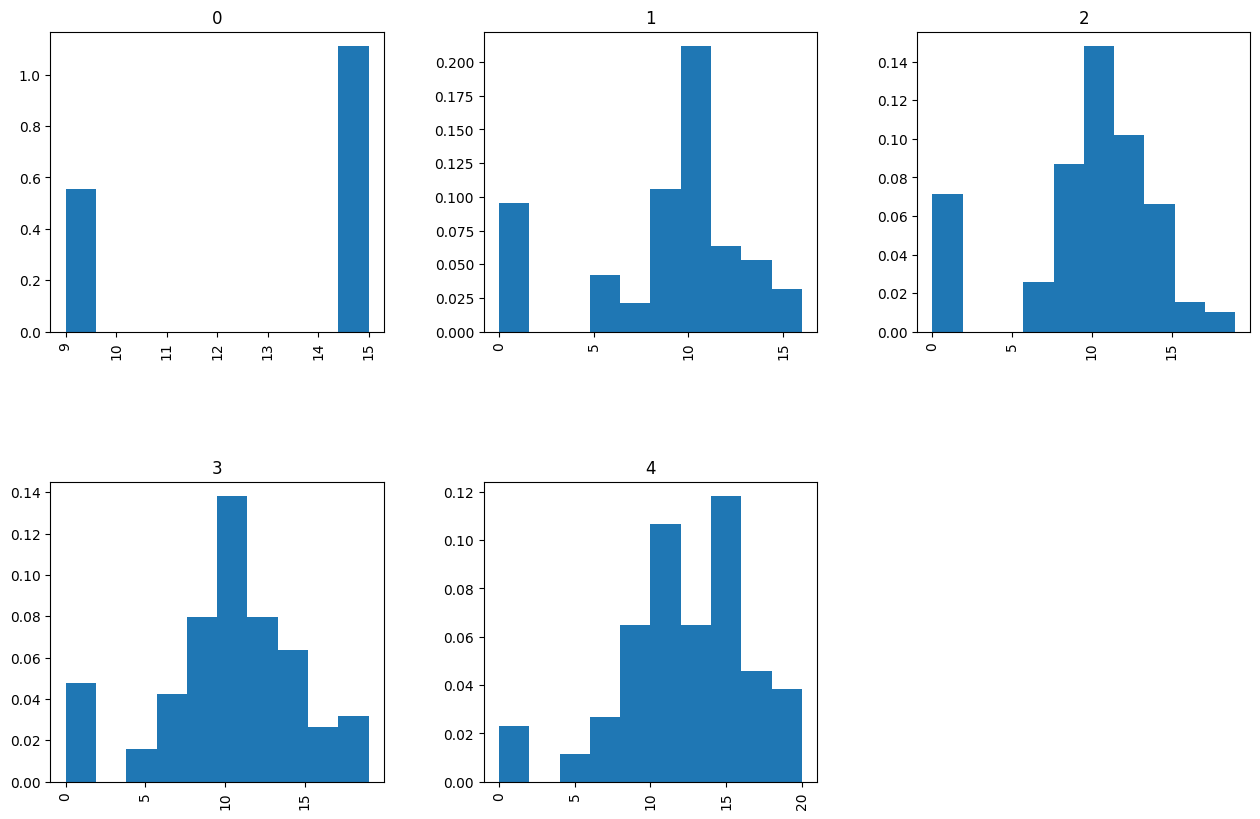

In [16]:
#| fig-align: center
#| out-width: "80%"
stud_perf.G3.hist(by=stud_perf.Medu, figsize=(15,10), density=True, 
                  layout=(2, 3))

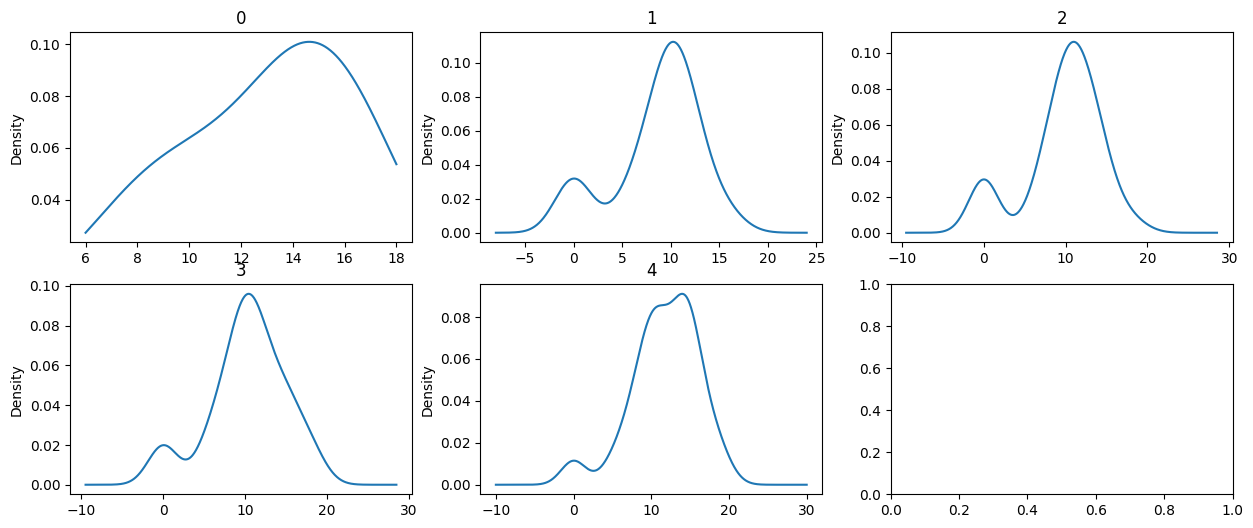

In [22]:
#| fig-align: center
#| out-width: "80%"
import matplotlib.pyplot as plt
f, axs = plt.subplots(2, 3, squeeze=False, figsize=(15,6))
out2 = stud_perf.groupby("Medu")
for y,df0 in enumerate(out2):
    tmp = plt.subplot(2, 3, y+1)
    df0[1].G3.plot(kind='kde')
    tmp.set_title(df0[0])

In [17]:
enumerate(out2)

G3    Axes(0.125,0.11;0.775x0.77)
dtype: object

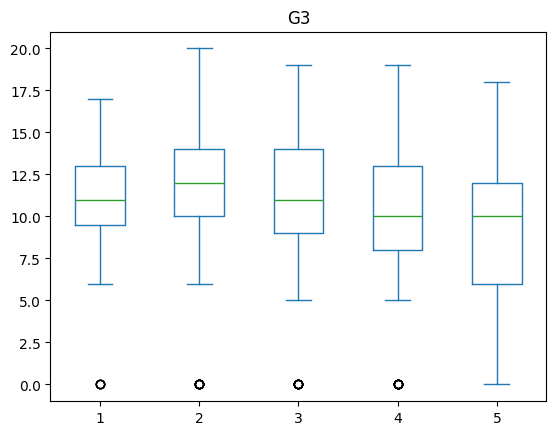

In [6]:
#| fig-align: center
#| out-width: "70%"
stud_perf.plot.box(column='G3', by='goout')

In [24]:
concrete = pd.read_csv("data/concrete+slump+test/slump_test.data")
concrete.rename(columns={'No':'id', 
                         'Compressive Strength (28-day)(Mpa)':'Comp_Strength'},  
                inplace=True)

<Axes: ylabel='Density'>

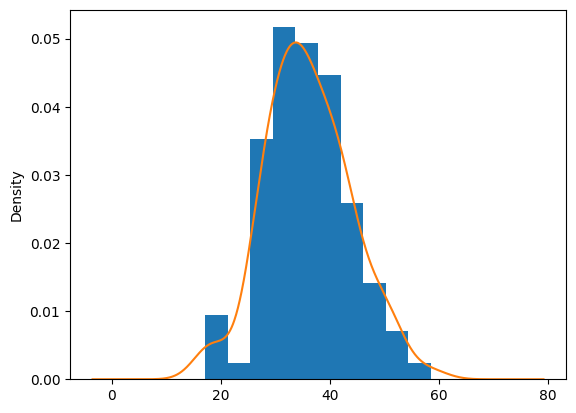

In [39]:
plt.hist(concrete.Comp_Strength, density=True)
concrete.Comp_Strength.plot(kind="kde")


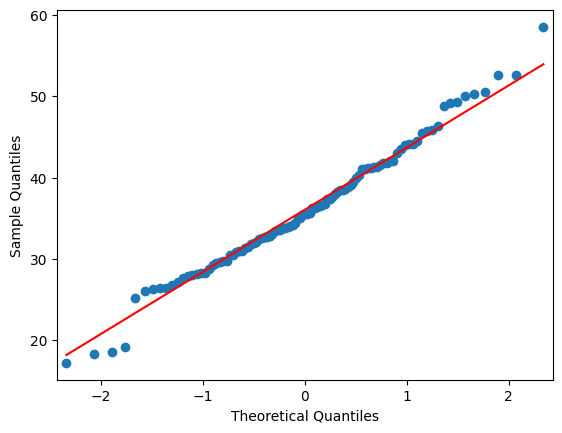

In [33]:
#| fig-align: center
#| out-width: "70%"
from scipy import stats
import statsmodels.api as sm
sm.qqplot(concrete.Comp_Strength, line="q");

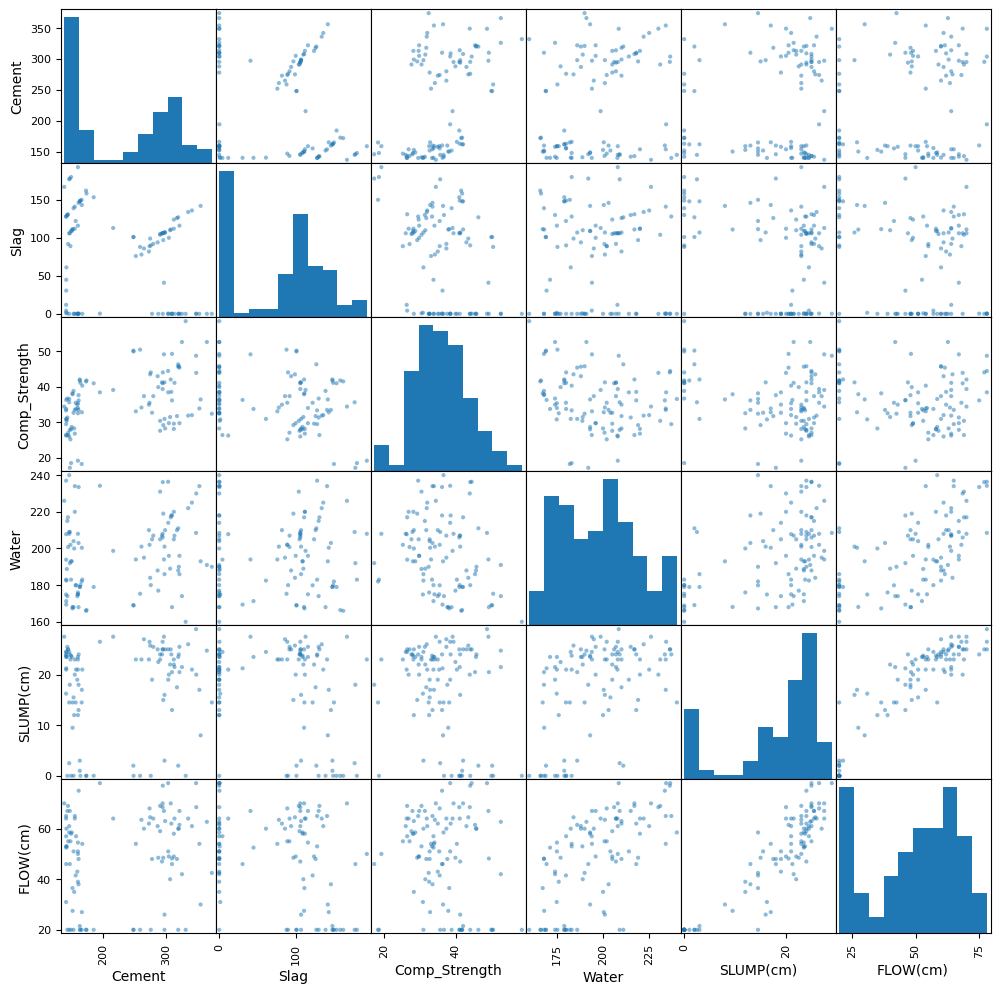

In [9]:
#| fig-align: center
#| out-width: "100%"
pd.plotting.scatter_matrix(concrete[['Cement', 'Slag', 'Comp_Strength', 'Water', 
                                     'SLUMP(cm)', 'FLOW(cm)']], 
                           figsize=(12,12));

In [40]:
#| fig-align: center
#| out-width: "100%"
corr = concrete[['Cement', 'Slag', 'Comp_Strength', 'Water', 
                 'SLUMP(cm)', 'FLOW(cm)']].corr()
print(corr)
corr.style.background_gradient(cmap='coolwarm_r')

                 Cement      Slag  Comp_Strength     Water  SLUMP(cm)  \
Cement         1.000000 -0.243553       0.445725  0.221091   0.145913   
Slag          -0.243553  1.000000      -0.331588 -0.026775  -0.284037   
Comp_Strength  0.445725 -0.331588       1.000000 -0.254235  -0.223358   
Water          0.221091 -0.026775      -0.254235  1.000000   0.466568   
SLUMP(cm)      0.145913 -0.284037      -0.223358  0.466568   1.000000   
FLOW(cm)       0.186461 -0.327231      -0.124029  0.632026   0.906135   

               FLOW(cm)  
Cement         0.186461  
Slag          -0.327231  
Comp_Strength -0.124029  
Water          0.632026  
SLUMP(cm)      0.906135  
FLOW(cm)       1.000000  


,Cement,Slag,Comp_Strength,Water,SLUMP(cm),FLOW(cm)
Cement,1.000000,-0.243553,0.445725,0.221091,0.145913,0.186461
Slag,-0.243553,1.000000,-0.331588,-0.026775,-0.284037,-0.327231
Comp_Strength,0.445725,-0.331588,1.000000,-0.254235,-0.223358,-0.124029
Water,0.221091,-0.026775,-0.254235,1.000000,0.466568,0.632026
SLUMP(cm),0.145913,-0.284037,-0.223358,0.466568,1.000000,0.906135
FLOW(cm),0.186461,-0.327231,-0.124029,0.632026,0.906135,1.000000
